In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df =pd.read_csv("players_stats.csv")
df.fillna(0,inplace=True)
df.head()

,Player_name,Batting_avg,Batting_strikerate,Batting_total_runs,Batting_boundary,Batting_dot,Bowling_balls,Bowling_over,Bowling_runs,Bowling_economy,Bowling_wickets,Bowling_total_runs,Bowling_avg,Bowling_strikerate
0,SC Ganguly,25.942308,106.81,1349.0,59.30,47.43,276.0,46.000000,363.0,7.891304,12.0,30.25,23.0,14.130435
1,BB McCullum,28.254902,131.60,2882.0,67.73,43.20,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,0.000000
2,RT Ponting,11.375000,71.09,91.0,35.16,53.12,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,0.000000
3,DJ Hussey,28.739130,122.98,1322.0,54.46,37.12,317.0,52.833333,473.0,8.952681,10.0,47.30,31.7,17.350158
4,Mohammad Hafeez,9.142857,77.11,64.0,62.50,60.24,60.0,10.000000,64.0,6.400000,2.0,32.00,30.0,11.666667


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
bowlingdata = df[["Bowling_over","Bowling_runs","Bowling_wickets"]]
bowlingdata.fillna(0,inplace =True)
bowlingdata.head()

,Bowling_over,Bowling_runs,Bowling_wickets
0,46.000000,363.0,12.0
1,0.000000,0.0,0.0
2,0.000000,0.0,0.0
3,52.833333,473.0,10.0
4,10.000000,64.0,2.0


In [5]:
def inertia_plotting(df):
    inertia = []
    K = range(1, 11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(df)
        inertia.append(kmeans.inertia_)
    plt.figure(figsize=(10, 6))
    plt.plot(K, inertia, 'bo-')
    plt.xlabel('Number of Clusters K')
    plt.ylabel('Inertia')
    plt.title('Elbow Method to find Optimal K')
    plt.xticks(K)
    plt.grid()
    plt.show()

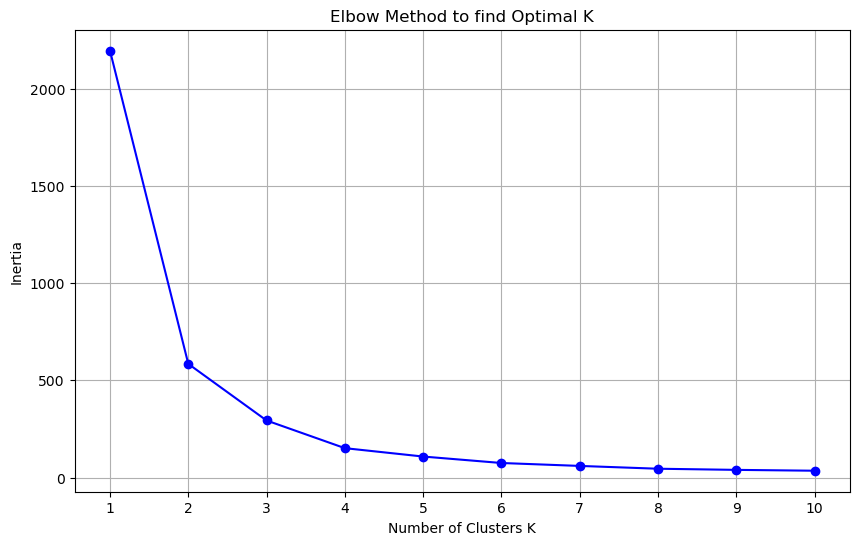

In [11]:
inertia_plotting(bowlingdatascaled)

In [7]:
scaler = StandardScaler()
bowlingdatascaled = scaler.fit_transform(bowlingdata)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(bowlingdatascaled)

KMeans(n_clusters=3, random_state=42)

In [10]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Print results
print("Centroids (scaled):\n", centroids)
print("Labels:\n", labels)

bowlingdata["Cluster"] = kmeans.labels_

Centroids (scaled):
 [[-0.35131415 -0.3557942  -0.34772898]
 [ 1.3705398   1.42083735  1.34059724]
 [ 4.05030283  3.98161313  4.0674754 ]]
Labels:
 [0 0 0 0 0 0 0 0 1 0 0 0 0 2 2 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 2 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 2 0 0 0 2 0 1
 0 0 0 1 0 0 1 2 1 1 2 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 1 1 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 2 0 0 0 0 0 1 0 0 0 0 1 2 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 2 1 0
 0 1 0 0 2 2 0 1 1 0 0 0 2 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1
 0 0 1 0 0 0 1 0 0 0 0 1 0 

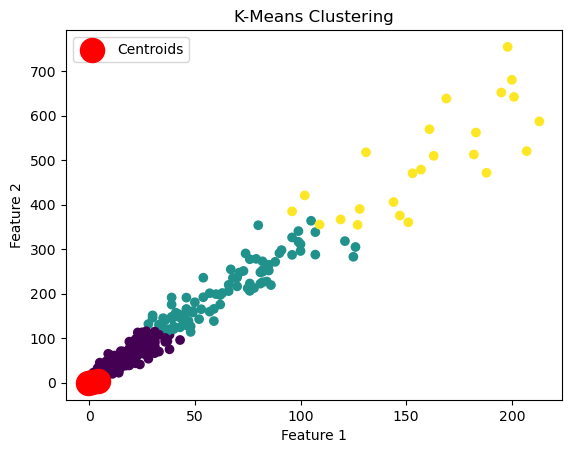

In [15]:
plt.scatter(bowlingdata['Bowling_wickets'], bowlingdata['Bowling_over'], c=bowlingdata['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [16]:
bowlingdata.insert(0,'Player_name',df["Player_name"])

In [18]:
bowlingdata.head(10)

,Player_name,Bowling_over,Bowling_runs,Bowling_wickets,Cluster
0,SC Ganguly,46.000000,363.0,12.0,0
1,BB McCullum,0.000000,0.0,0.0,0
2,RT Ponting,0.000000,0.0,0.0,0
3,DJ Hussey,52.833333,473.0,10.0,0
4,Mohammad Hafeez,10.000000,64.0,2.0,0
5,R Dravid,0.000000,0.0,0.0,0
6,W Jaffer,0.000000,0.0,0.0,0
7,V Kohli,41.833333,367.0,5.0,0
8,JH Kallis,290.333333,2279.0,74.0,1
9,CL White,7.000000,85.0,1.0,0


In [19]:
bowlingdata.tail(10)

,Player_name,Bowling_over,Bowling_runs,Bowling_wickets,Cluster
722,Gurnoor Brar,3.000000,42.0,0.0,0
723,R Goyal,4.000000,33.0,0.0,0
724,H Sharma,5.000000,57.0,0.0,0
725,N Burger,17.000000,141.0,7.0,0
726,KT Maphaka,6.000000,89.0,1.0,0
727,M Siddharth,9.166667,69.0,1.0,0
728,MP Yadav,12.166667,85.0,8.0,0
729,S Joseph,4.000000,43.0,0.0,0
730,N Thushara,26.000000,255.0,8.0,0
731,V Kaverappa,4.000000,36.0,2.0,0
